# **Customer segmenation**

**Customer Segmentation involves grouping customers based on shared characteristics, behaviors and preferences. By segmenting customers, businesses can tailor their strategies and target specific groups more effectively and enhance overall market value.**

## **Task 1: Import necessary libraries.**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## **Task 2: Load the dataset**

---



Load the dataset containing customer details such as marital status, income, number of items purchased, types of items purchased and more.

In [ ]:
customer = pd.read_csv('customer_data.csv')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


to check the shape of the dataset using `customer.shape`

In [ ]:
customer.shape

(2240, 29)

## **Task 3: Data Preprocessing**

---



1. Using `.info()` to check the null values and counts in the dataset.




In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

2. Using `.describe()` to check the data essential value to see the data in broader aspect such as mean, median, percentile, min, max and counts.

In [ ]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


3. `.isnull().sum()` to check null value in the dataset.



In [ ]:
for column in customer.columns:
    null_values_check = customer[column].isnull().sum()
    if null_values_check > 0:
        print(f'Column {column} contains {null_values_check} null values.')

Column Income contains 24 null values.


4. As the null values are less, we've consider to drop the rows with null values by using `dropna()`.

In [ ]:
customer = customer.dropna(axis=0)
print(f"shape of dataset after removing null values: {customer.shape} ")

shape of dataset after removing null values: (2216, 29) 


5. `nunique()` this method return the number of unique values in each column of a dataset. It makes it easy to identify the columns that are categorical or ordinal.

In [ ]:
customer.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


6. `'Dt_Customer'` column in the dataset contain values in date format, let's break this column into `'day'`, `'month'`, `'year'`.

In [ ]:
parts = customer["Dt_Customer"].str.split("-", n=3, expand=True)
customer["day"] = parts[0].astype('int')
customer["month"] = parts[1].astype('int')
customer["year"] = parts[2].astype('int')

7. we can drop these columns since we have all the important features.`Z_CostContact`, `Z_Revenue`, `Dt_Customer` using `dropna(axis = 1)`

In [ ]:
customer.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

In [ ]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'day', 'month', 'year'],
      dtype='object')

## **Task 3: Data Exploratory Analysis and Visualization**

---



Exploratory Data Analysis (EDA) is the process of using visualizations and summary statistics to understand a dataset's main characteristics, discover patterns, spot anomalies (like outliers), and test hypotheses.

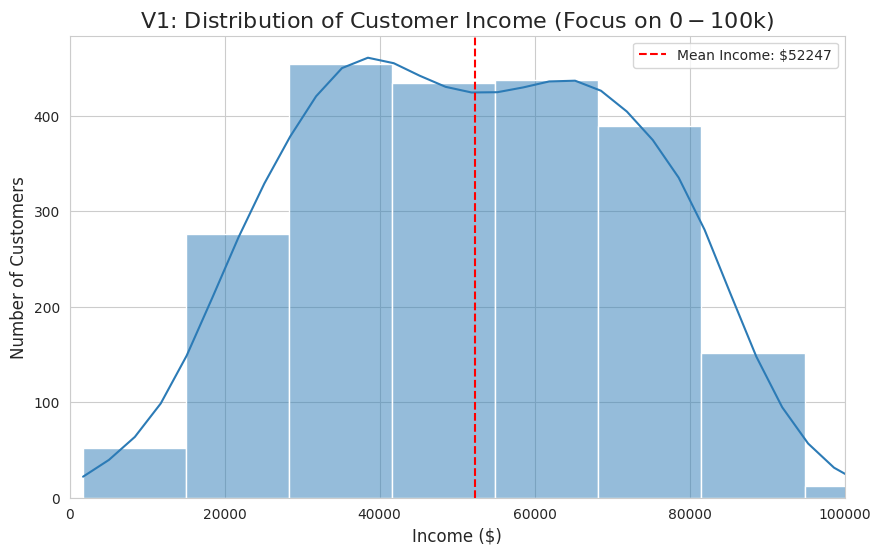

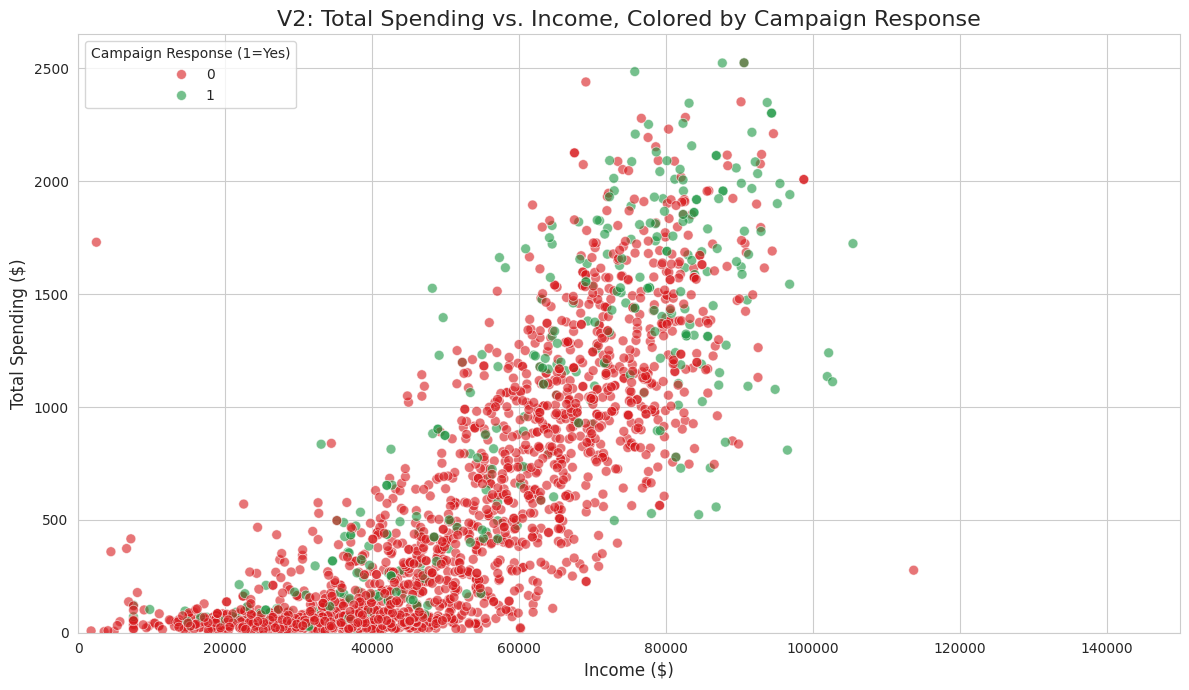

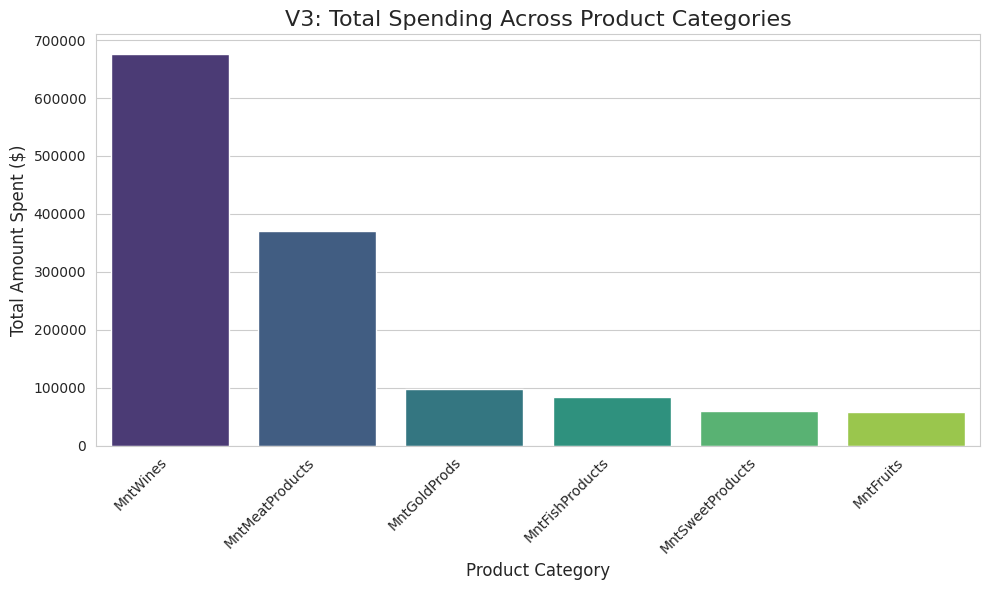

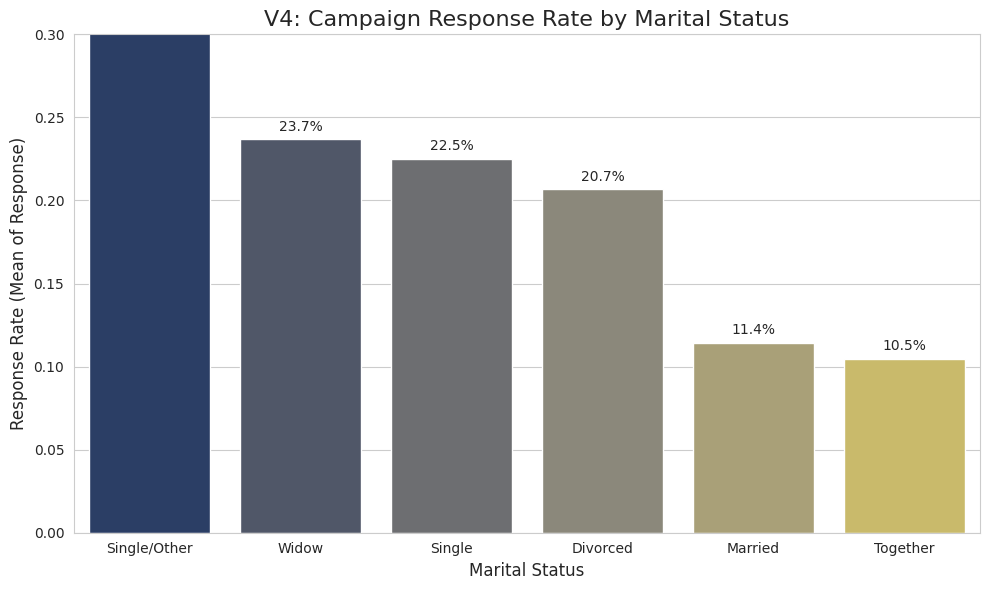


--- Key Summary Statistics ---
Total Customers Analyzed: 2216
Average Customer Age: 46.2 years
Overall Campaign Response Rate: 15.03%
------------------------------


In [ ]:
# Configure visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Feature Engineering
# Calculate Age (assuming analysis is performed in 2015 for context)
CURRENT_YEAR = 2015
customer['Age'] = CURRENT_YEAR - customer['Year_Birth']

# Calculate Total Spending
mnt_cols = [col for col in customer.columns if col.startswith('Mnt')]
customer['Total_Spending'] = customer[mnt_cols].sum(axis=1)

# Clean Marital_Status for better plotting (Combine 'Absurd', 'YOLO', 'Alone' into 'Single/Other')
customer['Marital_Status'] = customer['Marital_Status'].replace({
    'Absurd': 'Single/Other', 'YOLO': 'Single/Other', 'Alone': 'Single/Other'
})

# --- 2. Visualization Functions ---

def create_visualization_1(data):
    """Histogram of Customer Income Distribution."""
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Income', bins=50, kde=True, color='#2c7bb6')
    plt.title('V1: Distribution of Customer Income (Focus on $0-$100k)', fontsize=16)
    plt.xlabel('Income ($)', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xlim(0, 100000) # Zooming in on the main cluster
    plt.axvline(data['Income'].mean(), color='red', linestyle='--', label=f'Mean Income: ${data["Income"].mean():.0f}')
    plt.legend()
    plt.show()

def create_visualization_2(data):
    """Relationship between Total Spending and Income (for segmentation)."""
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=data, x='Income', y='Total_Spending', hue='Response',
                    palette={0: '#d7191c', 1: '#1a9641'}, alpha=0.6, s=50)
    plt.title('V2: Total Spending vs. Income, Colored by Campaign Response', fontsize=16)
    plt.xlabel('Income ($)', fontsize=12)
    plt.ylabel('Total Spending ($)', fontsize=12)
    plt.xlim(0, 150000)
    plt.ylim(0)
    plt.legend(title='Campaign Response (1=Yes)', loc='upper left')
    plt.tight_layout()
    plt.show()

def create_visualization_3(data):
    """Spending composition by Product Category."""
    spending_data = data[mnt_cols].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=spending_data.index, y=spending_data.values, palette='viridis')
    plt.title('V3: Total Spending Across Product Categories', fontsize=16)
    plt.xlabel('Product Category', fontsize=12)
    plt.ylabel('Total Amount Spent ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def create_visualization_4(data):
    """Campaign Response Rate by Marital Status."""
    response_rate = data.groupby('Marital_Status')['Response'].mean().sort_values(ascending=False).reset_index()

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Marital_Status', y='Response', data=response_rate, palette='cividis')
    plt.title('V4: Campaign Response Rate by Marital Status', fontsize=16)
    plt.xlabel('Marital Status', fontsize=12)
    plt.ylabel('Response Rate (Mean of Response)', fontsize=12)

    # Add percentage labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

    plt.ylim(0, 0.3)
    plt.tight_layout()
    plt.show()



# --- 3. Execute Visualizations ---
create_visualization_1(customer)
create_visualization_2(customer)
create_visualization_3(customer)
create_visualization_4(customer)


# --- 4. Print Summary Statistics for Findings ---
print("\n--- Key Summary Statistics ---")
print(f"Total Customers Analyzed: {len(customer)}")
print(f"Average Customer Age: {customer['Age'].mean():.1f} years")
print(f"Overall Campaign Response Rate: {customer['Response'].mean():.2%}")
print("-" * 30)

**Key finding in Data Exploratory Analysis**

---


*  High-Value Target: Focus on customers with Income ≥$60,000 who are Widowed, Single, or Divorced. This is the segment with the highest propensity to spend and respond to campaigns.

* Product Focus: Prioritize marketing spend on Wines and Meat Products across all campaign materials.

* Low-Value Target: Re-evaluate campaigns aimed at customers with Income ≤$40,000 or those who are Married/Together, as they represent a high volume of customers but a significantly lower rate of return (spending and responsiveness).

## **Task 2: Segmentation**

---



**1.** **Standardization**

`Standardization` is the method of feature scaling which is an integral part of feature engineering. It scales down the data and making it easier for the machine learning model to learn from it. It reduces the mean to ‘0’ and the standard deviation to ‘1’. I use the `sklearn.preprocessing.StandardScalar()`

In [ ]:
# Select features for clustering: Income, Total Spending, Age, and Recency (how recently they purchased)
features_for_clustering = ['Income', 'Age', 'Total_Spending', 'Recency']
X = customer[features_for_clustering]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**2**. **T-distributed Stochastic Neighbor**

---



We will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the values to low-dimensional embedding. We will use only two components to get which features maximum variance.

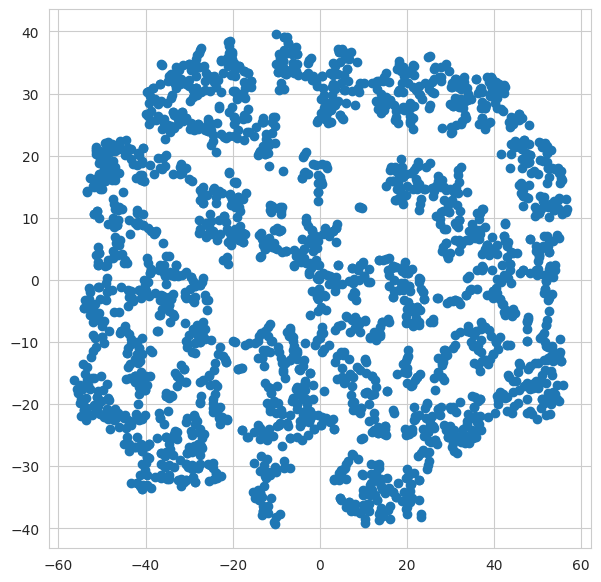

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(X_scaled)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

**3.** **K-Means Algorithm**

---



K-Means is a fundamental unsupervised clustering algorithm used to partition N data points into K predefined, distinct, non-overlapping groups (clusters). K-Means is primarily used for pattern recognition and data segmentation. Grouping customers based on their purchasing habits, income, and demographics to create actionable marketing targets.

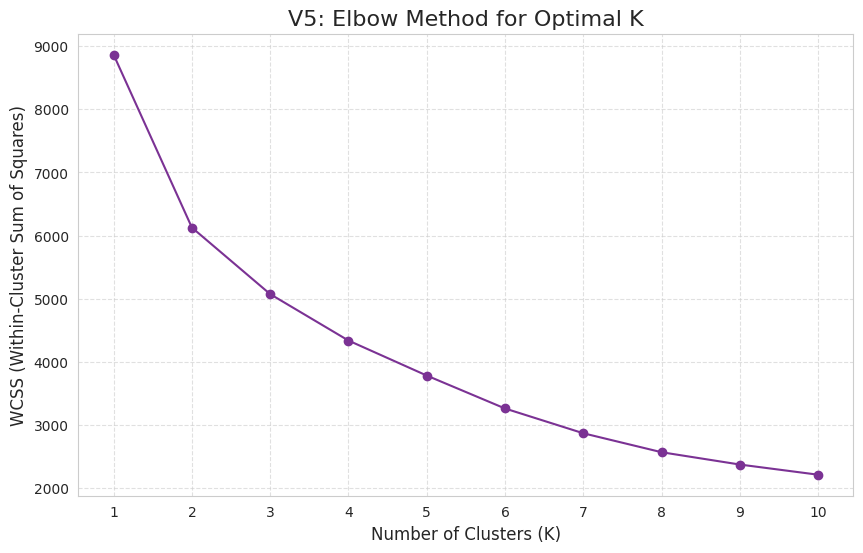


--- Key Summary Statistics ---
Total Customers Analyzed: 2216
Average Customer Age: 46.2 years
Overall Campaign Response Rate: 15.03%
------------------------------


In [ ]:
# Calculate Within-Cluster Sum of Squares (WCSS) for a range of K values
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

def create_visualization_5(wcss_values, k_range):
    """Elbow Method Plot to determine Optimal K."""
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss_values, marker='o', linestyle='-', color='#7b3294')
    plt.title('V5: Elbow Method for Optimal K', fontsize=16)
    plt.xlabel('Number of Clusters (K)', fontsize=12)
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
    plt.xticks(k_range)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- 4. Execute Visualizations and Summary ---
create_visualization_5(wcss, k_range)

# --- 5. Print Summary Statistics for Findings ---
print("\n--- Key Summary Statistics ---")
print(f"Total Customers Analyzed: {len(customer)}")
print(f"Average Customer Age: {customer['Age'].mean():.1f} years")
print(f"Overall Campaign Response Rate: {customer['Response'].mean():.2%}")
print("-" * 30)

**4.** **Elbow-plot**

---


The main requirement is that the number of clusters (K) must be specified before the analysis begins, which is why it's often paired with techniques like the Elbow Method to determine the optimal K.

Elbow-plot analysis: using the elbow method we can say that k = 3 or k = 4 is the optimal number of clusters that should be made as after k = 4 the value of the inertia is not decreasing drastically.

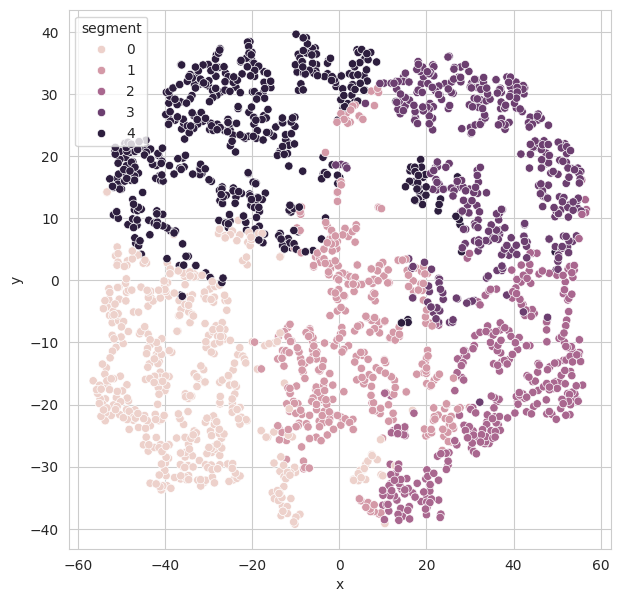

In [ ]:
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(X_scaled)

plt.figure(figsize=(7, 7))

df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})

sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()

**5**. **Analyze Customer Segments**

---



Let's analyze the characteristics of each cluster by looking at the mean values of the features used for clustering (Income, Age, Total_Spending, Recency) within each segment.

In [ ]:
# Analyze cluster characteristics
cluster_analysis = customer.groupby('Cluster')[features_for_clustering].mean()
display(cluster_analysis)

,Income,Age,Total_Spending,Recency
Cluster,,,,
0,38278.096875,42.387500,202.150000,22.354688
1,37214.808197,43.231148,177.222951,74.881967
2,65513.431068,60.337864,924.794175,49.252427
3,77253.829268,39.381375,1400.283814,51.578714


In [ ]:
# Analyze demographic and behavioral characteristics of clusters
for col in ['Marital_Status', 'Education', 'Kidhome', 'Teenhome', 'Response']:
    print(f"\nDistribution of {col} within each cluster:")
    display(customer.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0).style.format("{:.2%}")
)


Distribution of Marital_Status within each cluster:


Marital_Status,Divorced,Married,Single,Single/Other,Together,Widow
Cluster,,,,,,
0,9.69%,41.72%,22.03%,0.62%,23.12%,2.81%
1,9.67%,38.36%,22.95%,0.00%,27.05%,1.97%
2,12.43%,35.92%,16.70%,0.39%,27.57%,6.99%
3,10.42%,37.92%,23.06%,0.22%,26.16%,2.22%



Distribution of Education within each cluster:


Education,2n Cycle,Basic,Graduation,Master,PhD
Cluster,,,,,
0,10.00%,4.22%,48.28%,16.25%,21.25%
1,10.66%,4.26%,51.80%,16.39%,16.89%
2,6.99%,0.19%,46.41%,19.61%,26.80%
3,7.76%,0.00%,55.88%,13.30%,23.06%



Distribution of Kidhome within each cluster:


Kidhome,0,1,2
Cluster,,,
0,34.84%,62.34%,2.81%
1,31.48%,64.59%,3.93%
2,89.13%,10.10%,0.78%
3,90.69%,9.31%,0.00%



Distribution of Teenhome within each cluster:


Teenhome,0,1,2
Cluster,,,
0,51.56%,46.56%,1.88%
1,50.66%,46.89%,2.46%
2,38.83%,57.48%,3.69%
3,68.29%,30.60%,1.11%



Distribution of Response within each cluster:


Response,0,1
Cluster,,
0,84.06%,15.94%
1,95.25%,4.75%
2,83.88%,16.12%
3,73.61%,26.39%


## **Conclusion**

---


* **Based on the Elbow Method analysis, the optimal number of clusters for segmenting this customer data is likely K=3 or K=4.**

* **K=3 provides a strong, simple segmentation into groups that may represent Low-Value, Mid-Value, and High-Value customers.**

* **K=4 offers a slightly finer segmentation, potentially separating High-Value customers into "New" (low recency) and "Loyal" (high recency) groups.**